In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

DATA COLLECTION 


In [3]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [4]:
#number of rows and columns
wine_dataset.shape

(1599, 12)

In [5]:
#first 5 rows
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#statistical measures
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


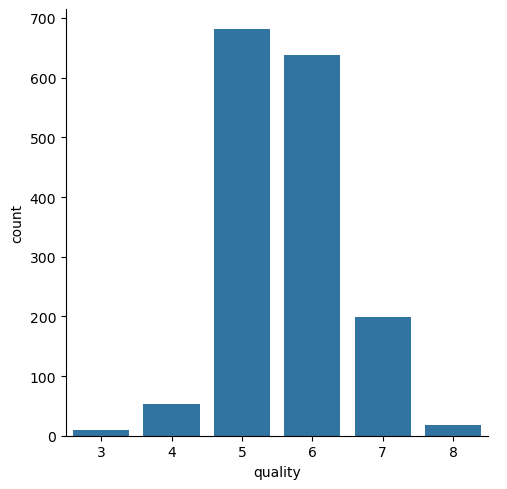

In [9]:
#number of values of each quality
sns.catplot(x='quality', data =wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

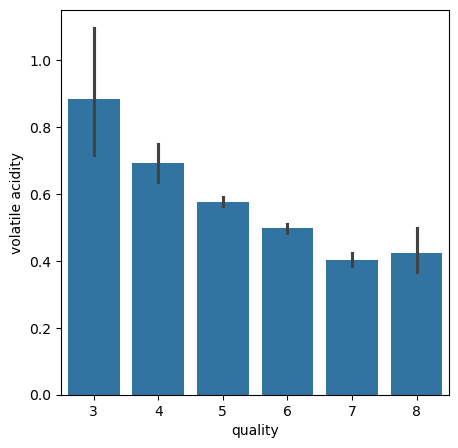

In [11]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data=wine_dataset)

MORE VOLATILE ACIDITY -> LESSER THE QUALITY
BEST QUALITY AT 0.4 VOLATILE ACIDITY


<Axes: xlabel='quality', ylabel='citric acid'>

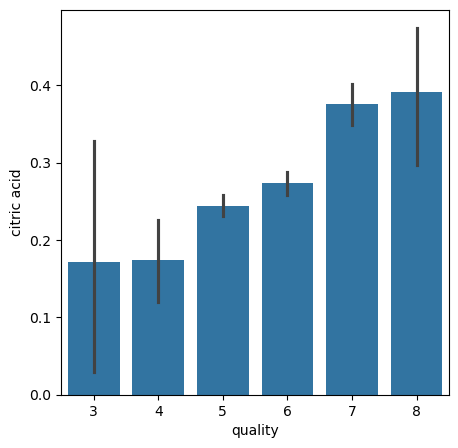

In [12]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data = wine_dataset)

MORE THE CITRIC ACID -> BETTER THE QUALITY

SIMILARLY FOR ALL OTHER FEATURES YOU CAN COMPARE.
THIS IS USED TO UNDERSTAND THE DATA THAT WE HAVE

FINDING CORRELATION BETWEEN ALL COLUMNS


In [13]:
correlation = wine_dataset.corr()

<Axes: >

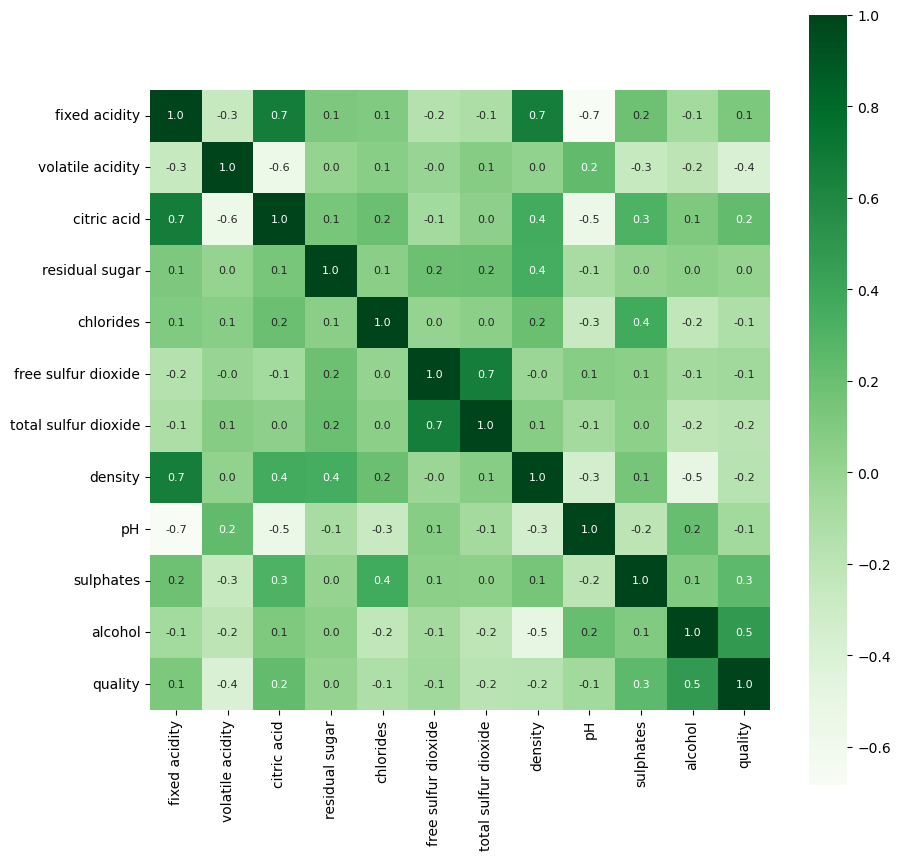

In [19]:
#HEATMAP FOR CORRELATION BETWEEN ALL COLUMNS
heatplot = plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws= {'size':8}, cmap = 'Greens')

In [20]:
#SEPERATE DATA AND LABELS
x = wine_dataset.drop('quality', axis=1)

In [21]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [22]:
#now lets binzarize our quality values, 7 and above is good(1), 6 and below is bad(0)
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [23]:
#split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

MODEL CLASSIFIER -  RANDOM FOREST CLASSIFIER

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(x_train, y_train)

RandomForestClassifier()

EVALUATION


In [27]:
#accuracy score test
x_test_prediction = model.predict(x_test)
accuracy_test = accuracy_score(x_test_prediction, y_test)
print('Test Accuracy: ',accuracy_test)

Accuracy:  0.9333333333333333


In [28]:
#accuracu score train
x_train_prediction = model.predict(x_train)
accuracy_train = accuracy_score(x_train_prediction, y_train)
print('Train accuracy: ',accuracy_train)

Train accuracy:  1.0


Building a Predictive System


In [36]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#changing input data to numpy array
numpy_array = np.asarray(input_data)
#reshape
reshaped_numpy_array = numpy_array.reshape(1,-1)
prediction_input_data = model.predict(reshaped_numpy_array)
print(prediction)

[1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
